正在讀取資料...
------------------------------
【資料基本資訊】
資料筆數: 25320, 欄位數: 23

【數值欄位統計摘要】
         rent_count   temperature      rainfall  mrt_dist_nearest_m
count  25320.000000  25320.000000  25320.000000        25320.000000
mean      24.201580     20.466094      0.528969           26.159242
std       22.382994      5.963540      1.046945            9.421297
min        0.000000      8.400000      0.000000           12.119775
25%        6.000000     15.200000      0.000000           21.222419
50%       20.000000     20.200000      0.000000           26.625707
75%       35.000000     25.400000      0.400000           30.375131
max      165.000000     34.300000     13.200000           40.453175


C:\Users\user\AppData\Local\Temp\ipykernel_9608\1809548692.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_avg, x='weekday', y='rent_count', palette='viridis', ax=axes[1])
C:\Users\user\AppData\Local\Temp\ipykernel_9608\1809548692.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_weekend', y='rent_count', palette='Set2', ax=axes[2])


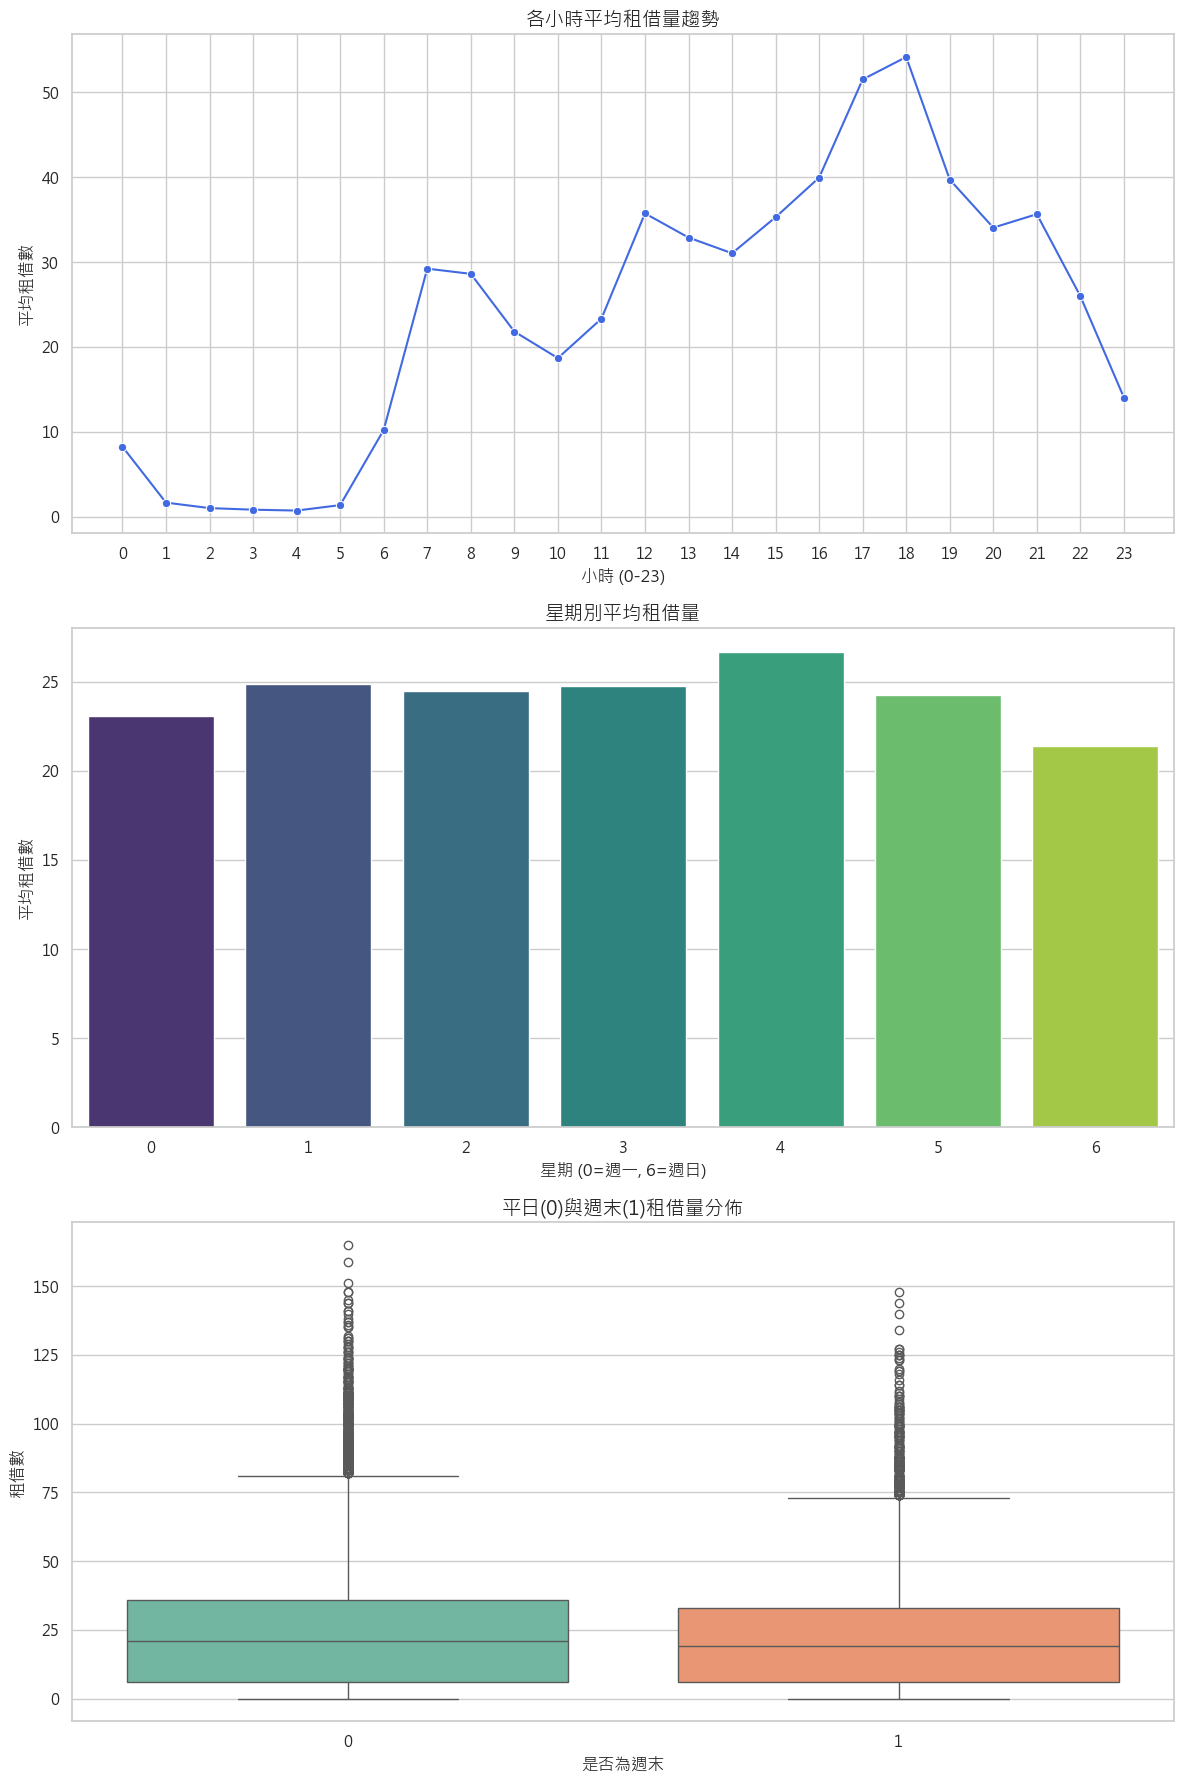

------------------------------
【相關性分析】


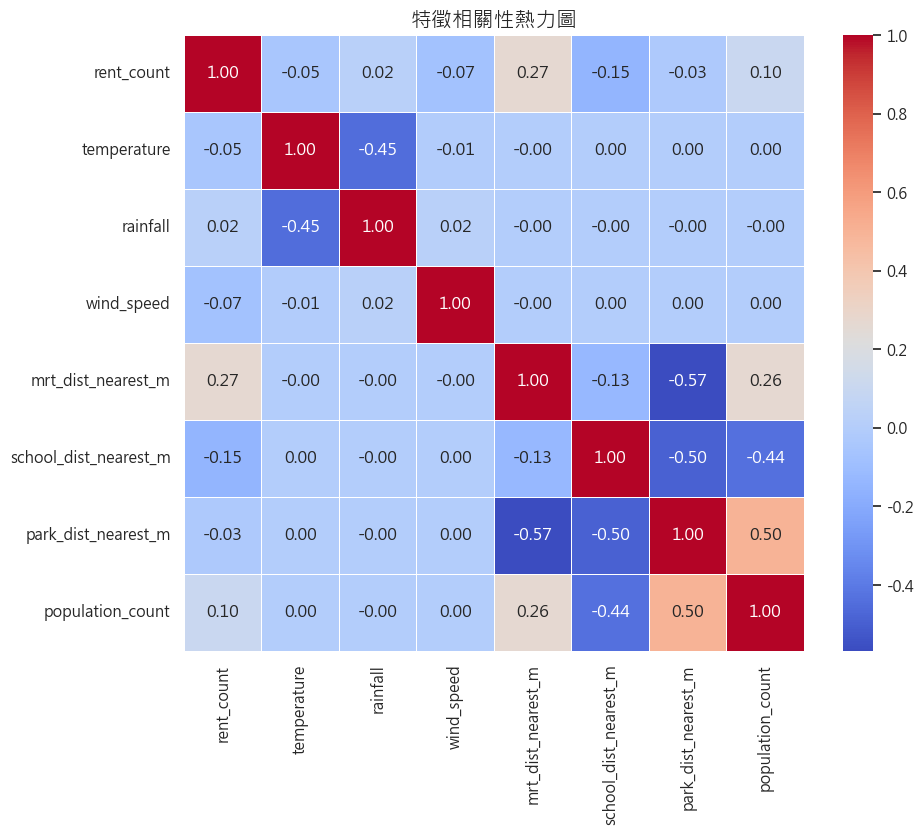


與租借量 (rent_count) 最相關的特徵：
rent_count               1.000000
mrt_dist_nearest_m       0.269840
population_count         0.102413
rainfall                 0.024023
park_dist_nearest_m     -0.027655
temperature             -0.050644
wind_speed              -0.074980
school_dist_nearest_m   -0.148566
Name: rent_count, dtype: float64
------------------------------
【熱門租借站點 Top 10】
rent_station
捷運公館站(2號出口)     202623
捷運公館站(3號出口)     107648
捷運龍山寺站(1號出口)    105930
捷運科技大樓站         101898
捷運芝山站(2號出口)      94685
Name: rent_count, dtype: int64


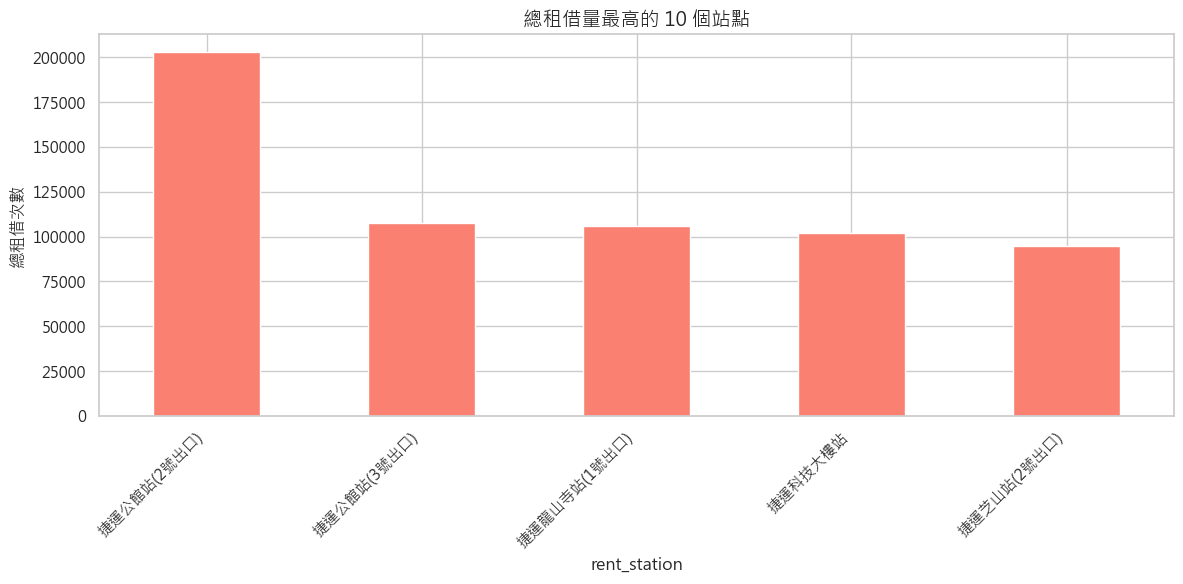

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import platform

# 設定繪圖風格
sns.set(style="whitegrid")

# 處理中文字型問題 (為了讓圖表能顯示中文)
def set_chinese_font():
    system = platform.system()
    if system == 'Windows':
        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    elif system == 'Darwin':  # macOS
        plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    else:
        plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False

set_chinese_font()

def analyze_data(file_path):
    print("正在讀取資料...")
    # 讀取 CSV 檔案
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"錯誤：找不到檔案 {file_path}")
        return

    # 1. 資料前處理
    # 將 rent_time 轉換為 datetime 格式
    if 'rent_time' in df.columns:
        df['rent_time'] = pd.to_datetime(df['rent_time'])
    
    print("-" * 30)
    print("【資料基本資訊】")
    print(f"資料筆數: {df.shape[0]}, 欄位數: {df.shape[1]}")
    print("\n【數值欄位統計摘要】")
    print(df[['rent_count', 'temperature', 'rainfall', 'mrt_dist_nearest_m']].describe())

    # 2. 時間維度分析 (視覺化)
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    
    # (A) 小時趨勢分析
    if 'hour' in df.columns and 'rent_count' in df.columns:
        hourly_avg = df.groupby('hour')['rent_count'].mean().reset_index()
        sns.lineplot(data=hourly_avg, x='hour', y='rent_count', marker='o', ax=axes[0], color='royalblue')
        axes[0].set_title('各小時平均租借量趨勢', fontsize=14)
        axes[0].set_xlabel('小時 (0-23)')
        axes[0].set_ylabel('平均租借數')
        axes[0].set_xticks(range(0, 24))

    # (B) 星期趨勢分析 (0=週一, 6=週日)
    if 'weekday' in df.columns and 'rent_count' in df.columns:
        weekday_avg = df.groupby('weekday')['rent_count'].mean().reset_index()
        sns.barplot(data=weekday_avg, x='weekday', y='rent_count', palette='viridis', ax=axes[1])
        axes[1].set_title('星期別平均租借量', fontsize=14)
        axes[1].set_xlabel('星期 (0=週一, 6=週日)')
        axes[1].set_ylabel('平均租借數')

    # (C) 週末與平日對比
    if 'is_weekend' in df.columns and 'rent_count' in df.columns:
        sns.boxplot(data=df, x='is_weekend', y='rent_count', palette='Set2', ax=axes[2])
        axes[2].set_title('平日(0)與週末(1)租借量分佈', fontsize=14)
        axes[2].set_xlabel('是否為週末')
        axes[2].set_ylabel('租借數')

    plt.tight_layout()
    plt.show()

    # 3. 相關性分析 (熱力圖)
    print("-" * 30)
    print("【相關性分析】")
    
    # 選取數值型特徵進行相關性計算
    numeric_cols = ['rent_count', 'temperature', 'rainfall', 'wind_speed', 
                    'mrt_dist_nearest_m', 'school_dist_nearest_m', 
                    'park_dist_nearest_m', 'population_count']
    
    # 確保欄位存在
    available_cols = [col for col in numeric_cols if col in df.columns]
    
    if len(available_cols) > 1:
        corr_matrix = df[available_cols].corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('特徵相關性熱力圖', fontsize=15)
        plt.show()
        
        # 顯示與 rent_count 最相關的前 5 個特徵
        if 'rent_count' in corr_matrix.index:
            print("\n與租借量 (rent_count) 最相關的特徵：")
            print(corr_matrix['rent_count'].sort_values(ascending=False))

    # 4. 地點分析 (Top 10 站點)
    if 'rent_station' in df.columns:
        print("-" * 30)
        print("【熱門租借站點 Top 10】")
        top_stations = df.groupby('rent_station')['rent_count'].sum().sort_values(ascending=False).head(10)
        print(top_stations)
        
        plt.figure(figsize=(12, 6))
        top_stations.plot(kind='bar', color='salmon')
        plt.title('總租借量最高的 10 個站點', fontsize=14)
        plt.ylabel('總租借次數')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    # 假設檔案在同一目錄下
    file_name = 'FINAL_MODEL_DATA_CLEAN.csv'
    analyze_data(file_name)